In [2]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt, seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  

import matplotlib.pyplot as plt, seaborn as sns


# merging two csv files
#flights = pd.concat(
#    map(pd.read_csv, ["../BITS PILANI FINAL PROJECT/2007.csv", "../BITS PILANI FINAL PROJECT/2008.csv"]), ignore_index=True)

df=pd.read_csv("../BITS PILANI FINAL PROJECT/2007.csv")
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7453210,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,NaN,0,0,0,0,0,0
7453211,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,NaN,0,0,0,0,0,0
7453212,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,NaN,0,0,0,15,0,0
7453213,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,NaN,0,0,0,0,0,36


In [3]:
#flights_needed_data = flights[0:100000]  # getting a segment 
#flights_needed_data = flights
#flights_needed_data.info()  # for an insight into the data
df=df[0:200000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               200000 non-null  int64  
 1   Month              200000 non-null  int64  
 2   DayofMonth         200000 non-null  int64  
 3   DayOfWeek          200000 non-null  int64  
 4   DepTime            194851 non-null  float64
 5   CRSDepTime         200000 non-null  int64  
 6   ArrTime            194469 non-null  float64
 7   CRSArrTime         200000 non-null  int64  
 8   UniqueCarrier      200000 non-null  object 
 9   FlightNum          200000 non-null  int64  
 10  TailNum            200000 non-null  object 
 11  ActualElapsedTime  194469 non-null  float64
 12  CRSElapsedTime     200000 non-null  float64
 13  AirTime            194469 non-null  float64
 14  ArrDelay           194469 non-null  float64
 15  DepDelay           194851 non-null  float64
 16  Or

In [4]:
# filtering out unnecessary columns
#flights_needed_data=flights_needed_data.drop(['Year','Month','DayofMonth','CRSArrTime','CRSElapsedTime','CRSDepTime','FlightNum','TailNum',
#                                              'FlightNum','Distance','TaxiOut','TaxiIn',
#                                              'CRSArrTime','CRSDepTime','CancellationCode'], axis=1)

#flights_needed_data


df=df.drop(['Year','Month','DayofMonth','CRSArrTime','CRSElapsedTime','CRSDepTime','FlightNum','TailNum',
                                              'FlightNum','Distance','TaxiOut','TaxiIn',
                                              'CRSArrTime','CRSDepTime','CancellationCode'], axis=1)

df

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,1232.0,1341.0,WN,69.0,54.0,1.0,7.0,SMF,ONT,0,0,0,0,0,0,0
1,1,1918.0,2043.0,WN,85.0,74.0,8.0,13.0,SMF,PDX,0,0,0,0,0,0,0
2,1,2206.0,2334.0,WN,88.0,73.0,34.0,36.0,SMF,PDX,0,0,3,0,0,0,31
3,1,1230.0,1356.0,WN,86.0,75.0,26.0,30.0,SMF,PDX,0,0,23,0,0,0,3
4,1,831.0,957.0,WN,86.0,74.0,-3.0,1.0,SMF,PDX,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2,1221.0,1321.0,OO,60.0,41.0,3.0,0.0,CIC,SFO,0,0,0,0,0,0,0
199996,2,1906.0,2057.0,OO,111.0,93.0,-6.0,-1.0,SFO,RDM,0,0,0,0,0,0,0
199997,2,718.0,928.0,OO,130.0,108.0,5.0,0.0,RDM,SFO,0,0,0,0,0,0,0
199998,2,1500.0,1709.0,OO,69.0,52.0,38.0,34.0,LAX,YUM,0,0,38,0,0,0,0


In [5]:
# replacing all NaN values with the mean of the attribute in which they are present
#flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

df=df.fillna(df.mean())

In [6]:
df['Status'] = np.where(df['ArrDelay'] <= 15, 0,1)

In [7]:
#df =flights_needed_data
    
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 1
    df.loc[df['Diverted'] == 1, 'Status'] = 1
    df.loc[df['Cancelled'] == 1, 'Status'] = 1

    # replacing na values in college with No college
df["LateAircraftDelay"].fillna(0, inplace = True)
df["SecurityDelay"].fillna(0, inplace = True)
df["NASDelay"].fillna(0, inplace = True)
df["WeatherDelay"].fillna(0, inplace = True)
df["CarrierDelay"].fillna(0, inplace = True)
#print("Y variable in two categories")

In [8]:
df

,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
0,1,1232.0,1341.0,WN,69.0,54.0,1.0,7.0,SMF,ONT,0,0,0,0,0,0,0,0
1,1,1918.0,2043.0,WN,85.0,74.0,8.0,13.0,SMF,PDX,0,0,0,0,0,0,0,0
2,1,2206.0,2334.0,WN,88.0,73.0,34.0,36.0,SMF,PDX,0,0,3,0,0,0,31,1
3,1,1230.0,1356.0,WN,86.0,75.0,26.0,30.0,SMF,PDX,0,0,23,0,0,0,3,1
4,1,831.0,957.0,WN,86.0,74.0,-3.0,1.0,SMF,PDX,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2,1221.0,1321.0,OO,60.0,41.0,3.0,0.0,CIC,SFO,0,0,0,0,0,0,0,0
199996,2,1906.0,2057.0,OO,111.0,93.0,-6.0,-1.0,SFO,RDM,0,0,0,0,0,0,0,0
199997,2,718.0,928.0,OO,130.0,108.0,5.0,0.0,RDM,SFO,0,0,0,0,0,0,0,0
199998,2,1500.0,1709.0,OO,69.0,52.0,38.0,34.0,LAX,YUM,0,0,38,0,0,0,0,1


In [9]:
# removing some more columns
df=df.drop(['Origin', 'Dest', 'UniqueCarrier','ArrDelay'],axis=1)
df


,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,AirTime,DepDelay,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
0,1,1232.0,1341.0,69.0,54.0,7.0,0,0,0,0,0,0,0,0
1,1,1918.0,2043.0,85.0,74.0,13.0,0,0,0,0,0,0,0,0
2,1,2206.0,2334.0,88.0,73.0,36.0,0,0,3,0,0,0,31,1
3,1,1230.0,1356.0,86.0,75.0,30.0,0,0,23,0,0,0,3,1
4,1,831.0,957.0,86.0,74.0,1.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2,1221.0,1321.0,60.0,41.0,0.0,0,0,0,0,0,0,0,0
199996,2,1906.0,2057.0,111.0,93.0,-1.0,0,0,0,0,0,0,0,0
199997,2,718.0,928.0,130.0,108.0,0.0,0,0,0,0,0,0,0,0
199998,2,1500.0,1709.0,69.0,52.0,34.0,0,0,38,0,0,0,0,1


In [10]:
df["Status"]=df["Status"].astype("category")
data = df.values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   DayOfWeek          200000 non-null  int64   
 1   DepTime            200000 non-null  float64 
 2   ArrTime            200000 non-null  float64 
 3   ActualElapsedTime  200000 non-null  float64 
 4   AirTime            200000 non-null  float64 
 5   DepDelay           200000 non-null  float64 
 6   Cancelled          200000 non-null  int64   
 7   Diverted           200000 non-null  int64   
 8   CarrierDelay       200000 non-null  int64   
 9   WeatherDelay       200000 non-null  int64   
 10  NASDelay           200000 non-null  int64   
 11  SecurityDelay      200000 non-null  int64   
 12  LateAircraftDelay  200000 non-null  int64   
 13  Status             200000 non-null  category
dtypes: category(1), float64(5), int64(8)
memory usage: 20.0 MB


In [12]:
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

from sklearn.ensemble import RandomForestClassifier

In [13]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [14]:
#hyperparameter tuning for Random Forest using GridSearchCV and fit the data.
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 13.3min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [30]:
grid_search.best_score_

rf_best = grid_search.best_estimator_
rf_best



RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

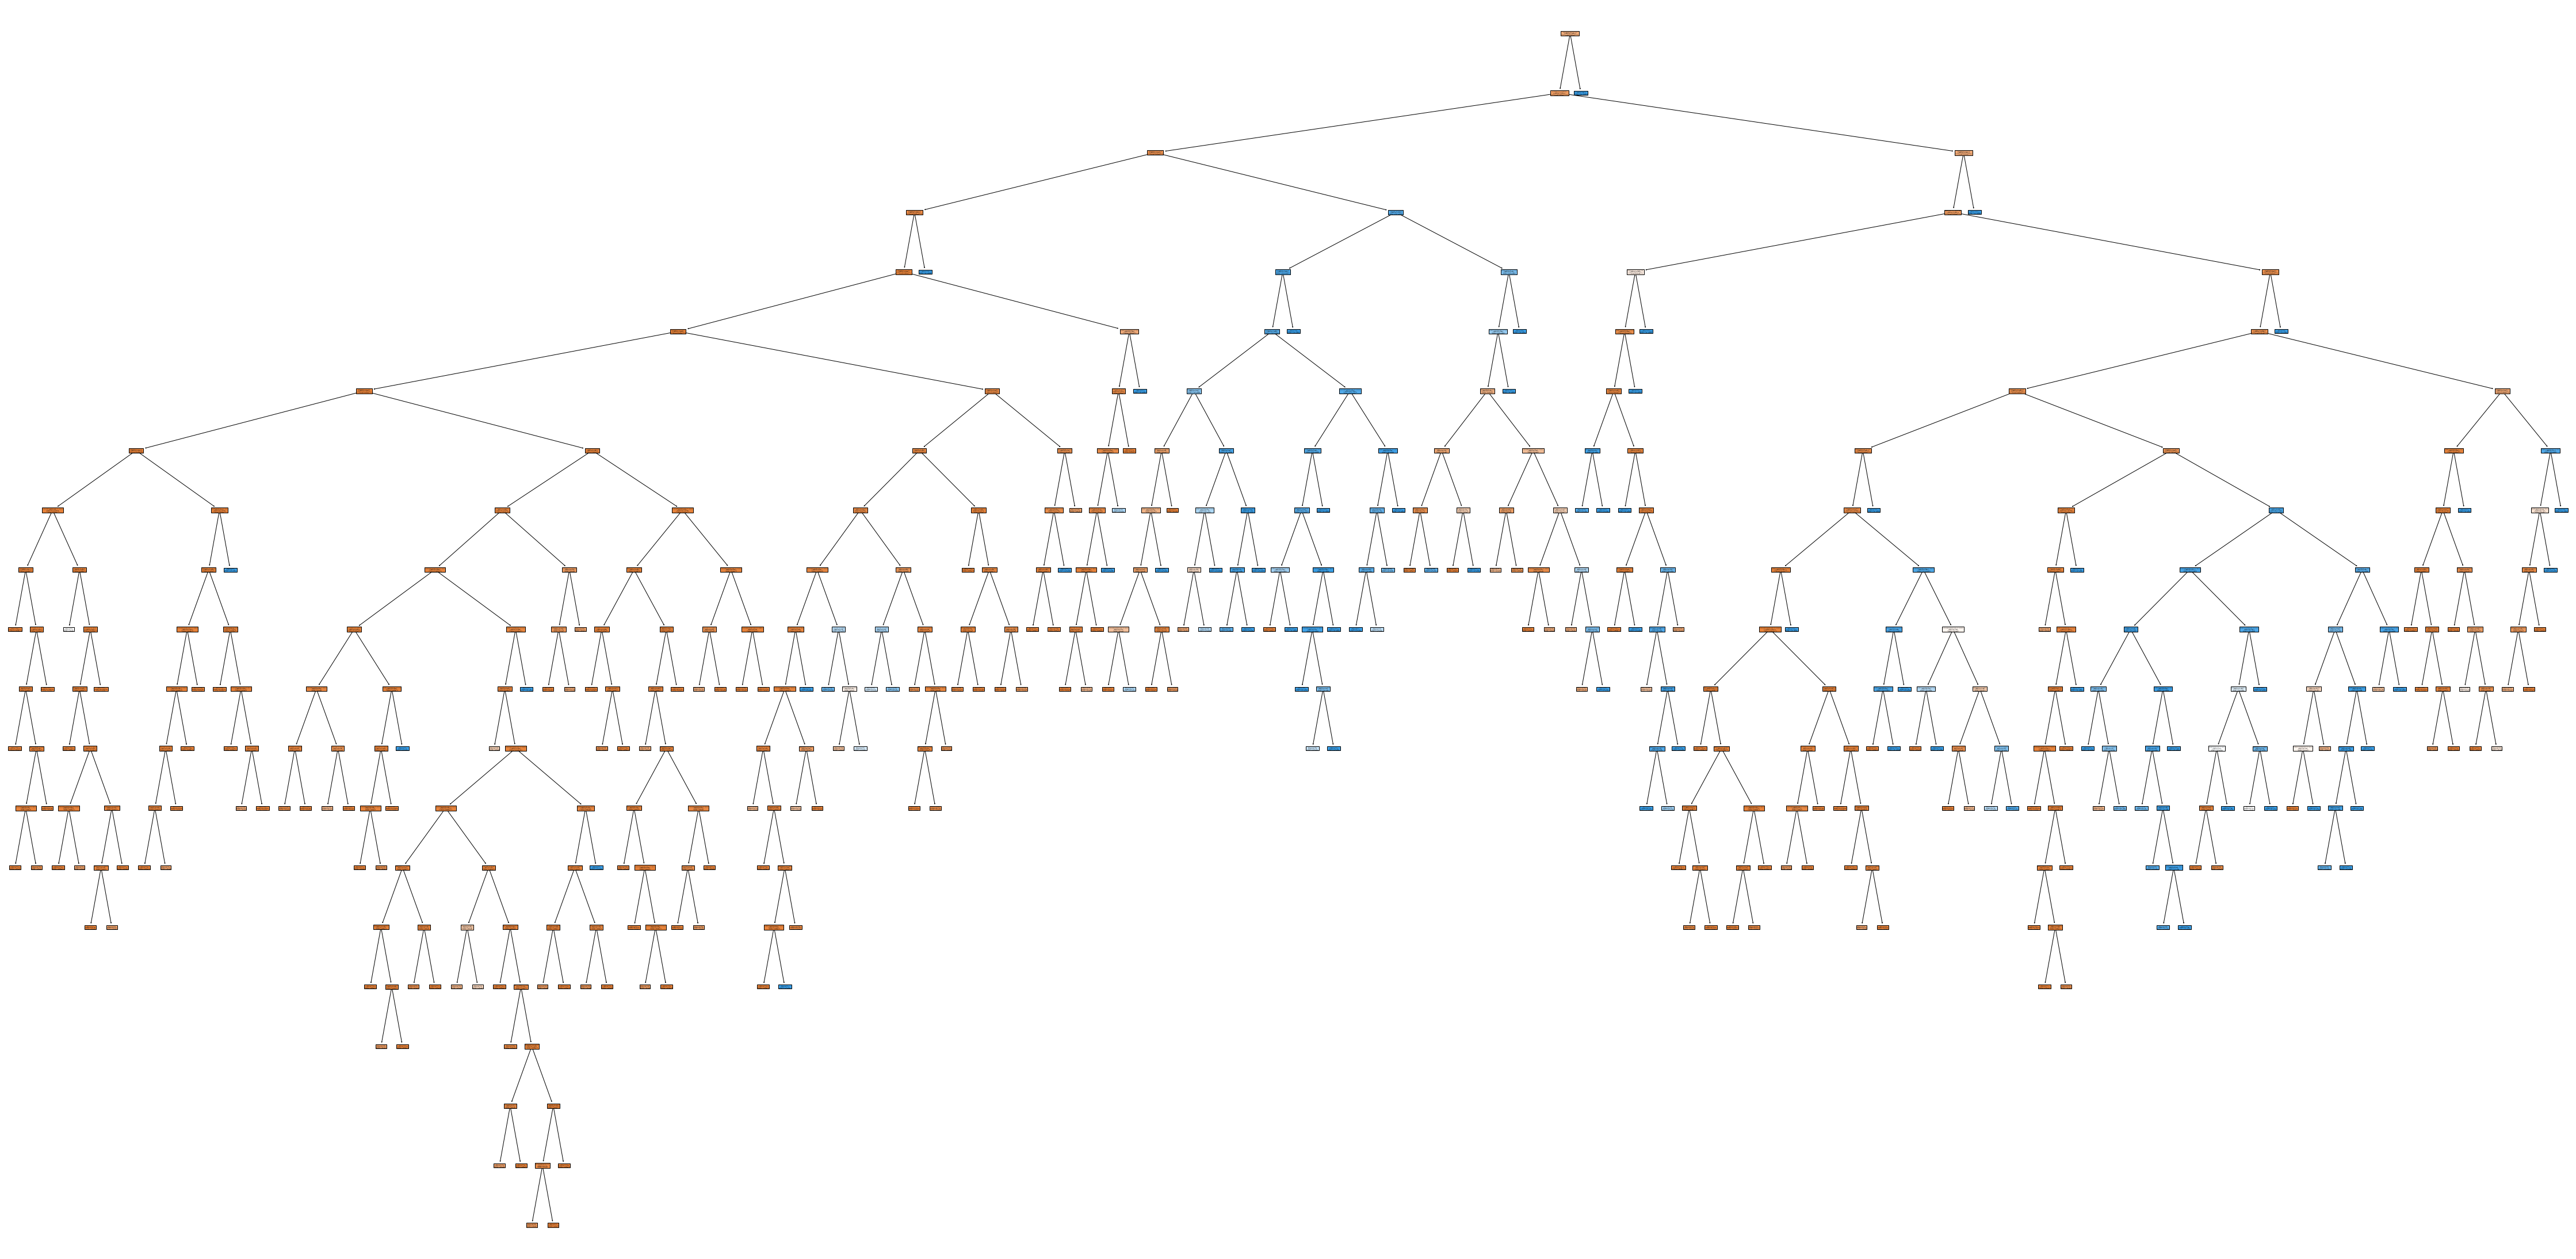

In [32]:
#Visualization
columns_ = df.iloc[:,:-1].columns
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names =columns_,class_names=['Delay', "No Delay"],filled=True);

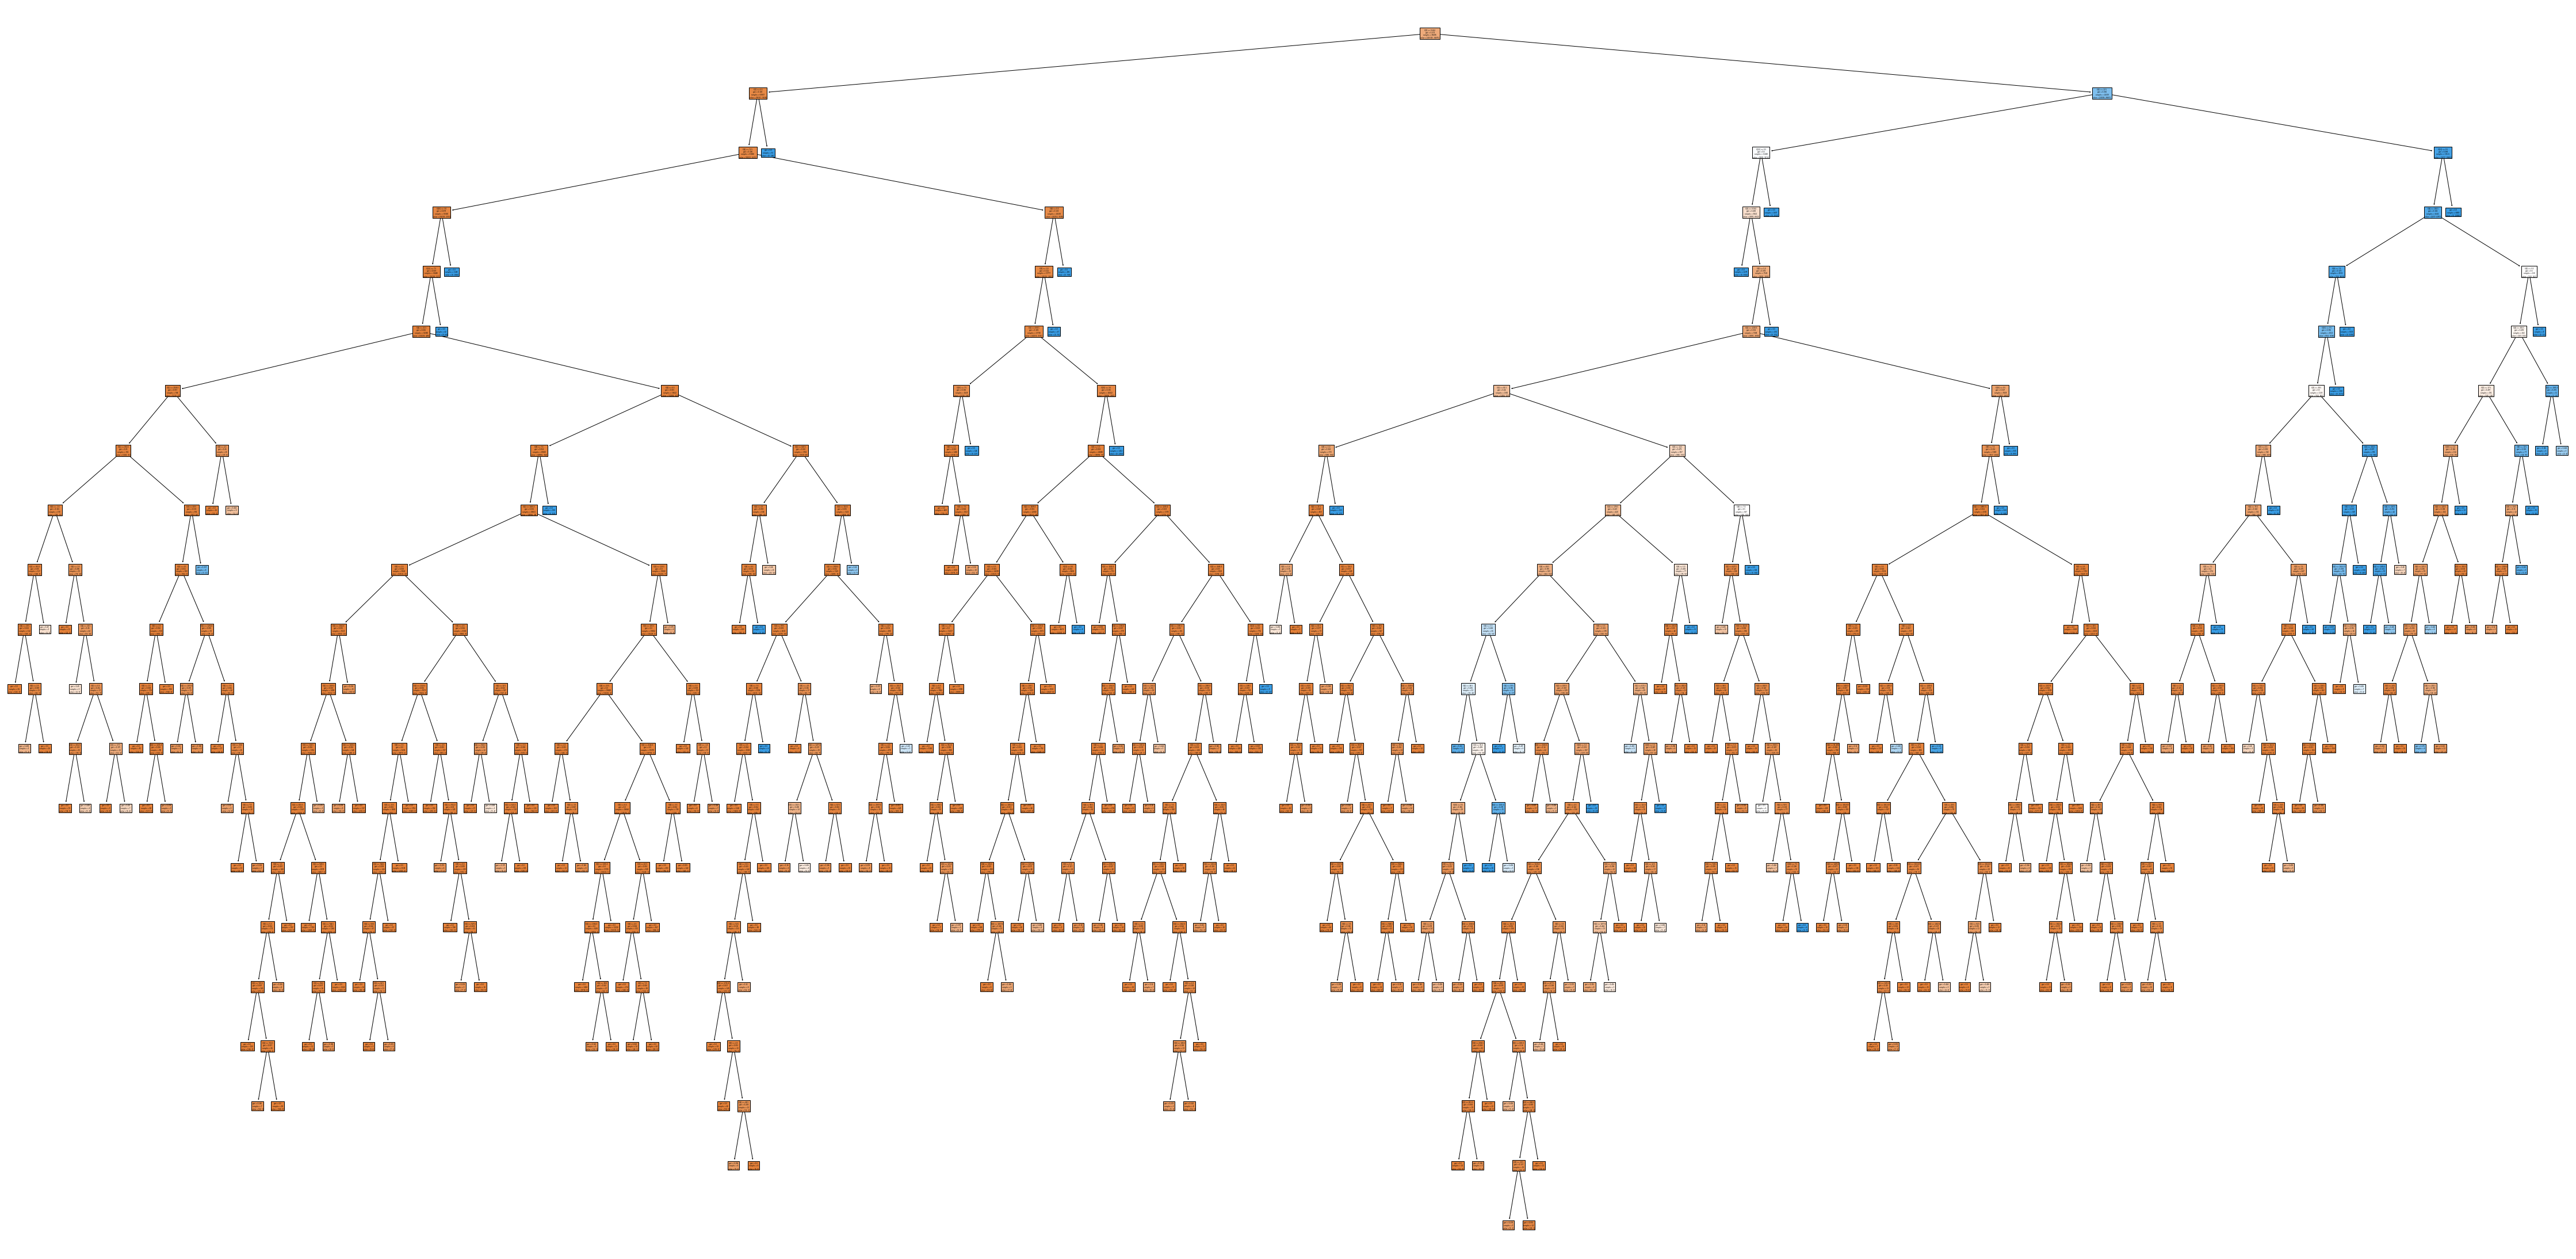

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], filled=True);

In [18]:
rf_best.feature_importances_

array([0.00047608, 0.01402626, 0.0118859 , 0.01368971, 0.0091803 ,
       0.29645549, 0.04092235, 0.00528466, 0.19333066, 0.02140477,
       0.23235423, 0.00079278, 0.16019681])

In [33]:
columns_ = df.iloc[:,:-1].columns

imp_df = pd.DataFrame({
    "Varname": columns_,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
5,DepDelay,0.296455
10,NASDelay,0.232354
8,CarrierDelay,0.193331
12,LateAircraftDelay,0.160197
6,Cancelled,0.040922
9,WeatherDelay,0.021405
1,DepTime,0.014026
3,ActualElapsedTime,0.013690
2,ArrTime,0.011886
4,AirTime,0.009180


In [34]:
from sklearn.metrics import confusion_matrix  
y_pred= rf_best.predict(X_test) 
cm= confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)

In [35]:
cm
ac

0.9997666666666667

In [36]:
cm

array([[45194,     1],
       [   13, 14792]], dtype=int64)